# Architectures of CNN


```{figure} https://www.mdpi.com/applsci/applsci-09-04500/article_deploy/html/images/applsci-09-04500-g001.png
:align: center
```

<!-- ![base_arch_of_cnn](img/parts_of_cnn.webp) -->

The basic architecture of a convolutional neural network consists of a series of convolutional and pooling layers. A fully connected layer is always used at the network output. In addition to these three layers, there are two more important parameters which are the dropout layer and the activation function which are defined below.

## Convolutional layer

The convolution layer is the first layer that is used to extract various objects from the input images and transfer the result to the unifying layer. It also ensures that spatial relationships between pixels are preserved.

````{admonition} Feature extraction
:class: dropdown
Mathematically, a single convolution operation is constructed by first reversing the operator, namely the convolution kernel, both by row and column.

Occasionally, this step is skipped due to kernels of central symmetry. 

Secondly, the convolution kernel is shifted by a fixed stride over the whole original image (the kernel should not exceed the image range). And at each placement, the resulting value would be a combination of the original elements weighted by the reversed kernel respectively. 

```{figure} https://media2.giphy.com/media/i4NjAwytgIRDW/giphy.gif
:align: center
```
````

## Pooling layer

Pooling layers consolidate the features learned by CNNs. Its purpose is to gradually shrink the representation’s spatial dimension to minimize the number of parameters and computations in the network.


So there are two types of poolings:
```{figure} https://cdn-images-1.medium.com/v2/resize:fit:726/1*fXxDBsJ96FKEtMOa9vNgjA.gif
:align: center
```

Let’s explore the working of Pooling Layers using TensorFlow. Create a NumPy array and reshape it.

```python
matrix=np.array([[3.,2.,0.,0.],
                [0.,7.,1.,3.],
                [5.,2.,3.,0.],
                [0.,9.,2.,3.]]).reshape(1,4,4,1)
```

### Max pooling

```python
max_pooling=tf.keras.layers.MaxPool2D(pool_size=2,strides=2)
max_pooled_matrix=max_pooling(matrix)
print(max_pooled_matrix.shape)
print(tf.squeeze(max_pooled_matrix))
```

```python
(1, 2, 2, 1)
tf.Tensor(
[[7. 3.]
[9. 3.]], shape=(2, 2), dtype=float32)
```

### Average pooling

```python
average_pooling=tf.keras.layers.AveragePooling2D(pool_size=2, strides=2)
average_pooled_matrix=average_pooling(matrix)
print(averge_pooled_matrix.shape)
print(tf.squeeze(average_pooled_matrix))
```

```python
(1, 2, 2, 1)
tf.Tensor(
[[3. 1.]
 [4. 2.]], shape=(2, 2), dtype=float32)
```

````{admonition} Question
:class: important
What is the purpose of pooling layers in a CNN?
```{admonition} Answer
:class: tip, dropdown
Pooling layers reduce the spatial dimensions of feature maps while retaining essential information. Max pooling, for example, extracts the most important features by selecting the maximum value within a defined window, effectively downsampling the data and enhancing computational efficiency.
```
````

## Activation layer

An activation layer in a CNN is a layer that serves as a non-linear transformation on the output of the convolutional layer. It is a primary component of the network, allowing it to learn complex relationships between the input and output data.


Common activation functions used in CNNs include ***ReLu (Rectified Linear Unit)***, ***sigmoid***, and ***tanh***.


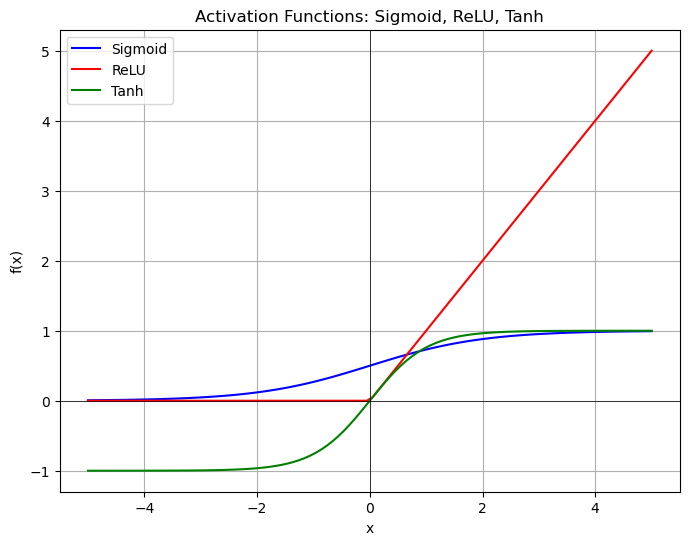

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Tanh function
def tanh(x):
    return np.tanh(x)

# Generate x values
x = np.linspace(-5, 5, 100)

# Calculate y values for each activation function
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Plotting all three activation functions
plt.figure(figsize=(8, 6))
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')
plt.plot(x, y_relu, label='ReLU', color='red')
plt.plot(x, y_tanh, label='Tanh', color='green')
plt.title('Activation Functions: Sigmoid, ReLU, Tanh')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

<span style="display:none" id="q_cnn_activation_function">W3sicXVlc3Rpb24iOiAiV2hpY2ggYWN0aXZhdGlvbiBmdW5jdGlvbiBpcyBjb21tb25seSB1c2VkIGluIGNvbnZvbHV0aW9uYWwgbmV1cmFsIG5ldHdvcmtzIChDTk5zKSB0byBpbnRyb2R1Y2Ugbm9uLWxpbmVhcml0eT8iLCAidHlwZSI6ICJtdWx0aXBsZV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJTaWdtb2lkIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gU2lnbW9pZCBpcyBvZnRlbiB1c2VkIGluIG90aGVyIHR5cGVzIG9mIG5ldHdvcmtzLCBidXQgdGhlcmUncyBhIG1vcmUgY29tbW9uIGFjdGl2YXRpb24gZnVuY3Rpb24gaW4gQ05Ocy4ifSwgeyJhbnN3ZXIiOiAiUmVMVSAoUmVjdGlmaWVkIExpbmVhciBVbml0KSIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIFJlTFUgaXMgYSBjb21tb25seSB1c2VkIGFjdGl2YXRpb24gZnVuY3Rpb24gaW4gY29udm9sdXRpb25hbCBuZXVyYWwgbmV0d29ya3MuIn0sIHsiYW5zd2VyIjogIlRhbmgiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUYW5oIGlzIGFub3RoZXIgYWN0aXZhdGlvbiBmdW5jdGlvbiwgYnV0IGl0J3Mgbm90IGFzIGNvbW1vbmx5IHVzZWQgaW4gQ05OcyBhcyB0aGUgY29ycmVjdCBhbnN3ZXIuIn0sIHsiYW5zd2VyIjogIkxpbmVhciIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJJbmNvcnJlY3QuIFRoZSBsaW5lYXIgYWN0aXZhdGlvbiBmdW5jdGlvbiBpcyBub3QgY29tbW9ubHkgdXNlZCBpbiBoaWRkZW4gbGF5ZXJzIG9mIENOTnMuIn1dfV0=</span>


In [7]:
from jupyterquiz import display_quiz
display_quiz('#q_cnn_activation_function')

<IPython.core.display.Javascript object>

## Fully Connected Layer

Fully Connected Layer (also known as Hidden Layer) is the last layer in the convolutional neural network. This layer is a combination of Affine function and Non-Linear function. Fully Connected layer takes input from Flatten Layer which is a one-dimensional layer (1D Layer). The data coming from Flatten Layer is passed first to Affine function and then to Non-Linear function. The combination of 1 Affine function and 1 Non-Linear Function is called as 1 FC (Fully Connected) or 1 Hidden Layer.


```python
Affine Function: y = Wx + b
Non-Linear Function: Sigmoid, TanH and ReLu
```

```{math}
:label: fcl
y_{jk}(x) = f * (\sum\limits _{i=1} ^{n_{H}}  x_{i} + w_{j0})
```

<span style="display:none" id="q_cnn_stride">WwogICAgewogICAgICAgICJxdWVzdGlvbiI6ICJUaGUgc3RyaWRlIHBhcmFtZXRlciBpbiBhIGNvbnZvbHV0aW9uYWwgbGF5ZXIgZGV0ZXJtaW5lcyB0aGUgc2l6ZSBvZiB0aGUgZmlsdGVyPyIsCiAgICAgICAgInR5cGUiOiAibXVsdGlwbGVfY2hvaWNlIiwKICAgICAgICAiYW5zd2VycyI6IFsKICAgICAgICAgICAgewogICAgICAgICAgICAgICAgImFuc3dlciI6ICJUcnVlIiwKICAgICAgICAgICAgICAgICJjb3JyZWN0IjogRmFsc2UsCiAgICAgICAgICAgICAgICAiZmVlZGJhY2siOiAiSW5jb3JyZWN0ISBUaGUgc3RyaWRlIHBhcmFtZXRlciBpbiBhIGNvbnZvbHV0aW9uYWwgbGF5ZXIgZG9lcyBub3QgZGV0ZXJtaW5lIHRoZSBzaXplIG9mIHRoZSBmaWx0ZXIuIgogICAgICAgICAgICB9LAogICAgICAgICAgICB7CiAgICAgICAgICAgICAgICAiYW5zd2VyIjogIkZhbHNlIiwKICAgICAgICAgICAgICAgICJjb3JyZWN0IjogVHJ1ZSwKICAgICAgICAgICAgICAgICJmZWVkYmFjayI6ICJDb3JyZWN0ISBUaGUgc3RyaWRlIHBhcmFtZXRlciByZWZlcnMgdG8gdGhlIHN0ZXAgc2l6ZSB3aXRoIHdoaWNoIHRoZSBmaWx0ZXIgKGFsc28ga25vd24gYXMgdGhlIGtlcm5lbCkgbW92ZXMgYWNyb3NzIHRoZSBpbnB1dCBkYXRhIG9yIGZlYXR1cmUgbWFwIGR1cmluZyB0aGUgY29udm9sdXRpb24gb3BlcmF0aW9uLiIKICAgICAgICAgICAgfQogICAgICAgIF0KICAgIH0KXQ==</span>

In [6]:
from jupyterquiz import display_quiz
display_quiz('#q_cnn_stride')

<IPython.core.display.Javascript object>

## Overview of iconic architectures of CNN


```{figure} https://miro.medium.com/v2/resize:fit:570/0*y8AuUHSoTGRqX40h.jpeg
:align: center
```

<!-- ![dicaprio_inception_meme](img/meme_dl.jpg) -->

### **LeNet**

LeNet 5 architecture is the *‘Hello World’* in the domain of Convolution Neural Networks that firstly showed results on the [*MNIST*](https://www.kaggle.com/datasets/hojjatk/mnist-dataset) digit image classification task. For the first time, convolutional layers with a 5x5 core were successfully used in the architecture. As a activation function they have used *tan(h)* because of its popularity at this time (1998).




```{figure} https://production-media.paperswithcode.com/methods/LeNet_Original_Image_48T74Lc.jpg
:align: center
```

<!-- ![lenet](img/lenet.jpg) -->

### Example: Fashion MNIST dataset


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D

# Load the CSV datasets
train_path = 'data/fashion-mnist_train.csv'
test_path = 'data/fashion-mnist_test.csv'

raw_data_train = pd.read_csv(train_path)
raw_data_test = pd.read_csv(test_path)

# Extract features and labels
X_train = raw_data_train.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(raw_data_train.iloc[:, 0], num_classes=10)

X_test = raw_data_test.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_test = tf.keras.utils.to_categorical(raw_data_test.iloc[:, 0], num_classes=10)

In [2]:
# Build LeNet-5 model
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')



Epoch 1/20


375/375 [==============================] - 11s 19ms/step - loss: 0.8051 - accuracy: 0.7030 - val_loss: 0.6480 - val_accuracy: 0.7378
Epoch 2/20
375/375 [==============================] - 7s 18ms/step - loss: 0.5404 - accuracy: 0.7987 - val_loss: 0.5086 - val_accuracy: 0.8164
Epoch 3/20
375/375 [==============================] - 7s 18ms/step - loss: 0.4771 - accuracy: 0.8218 - val_loss: 0.4845 - val_accuracy: 0.8255
Epoch 4/20
375/375 [==============================] - 7s 20ms/step - loss: 0.4365 - accuracy: 0.8390 - val_loss: 0.4273 - val_accuracy: 0.8466
Epoch 5/20
375/375 [==============================] - 7s 19ms/step - loss: 0.4090 - accuracy: 0.8505 - val_loss: 0.4032 - val_accuracy: 0.8561
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3878 - accuracy: 0.8585 - val_loss: 0.3817 - val_accuracy: 0.8625
Epoch 7/20
375/375 [==============================] - 7s 20ms/step - loss: 0.3648 - accuracy: 0.8660 - val_loss: 0.3798 - val_accuracy: 0

### **AlexNet**

AlexNet, which employed an 8-layer CNN, won the ImageNet Large Scale Visual Recognition Challenge 2012 by a large margin ([Russakovsky et al., 2013](https://d2l.ai/chapter_references/zreferences.html#id243)). This network showed, for the first time, that the features obtained by learning can transcend manually-designed features, breaking the previous paradigm in computer vision.


```{figure} https://miro.medium.com/v2/resize:fit:1400/0*IOvC3mgxzKBO502e.png
:align: center
```

<!-- ![alexnet](img/alexnet.png) -->

In [3]:
# Build a simplified version of AlexNet model
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')



Epoch 1/10
375/375 [==============================] - 22s 49ms/step - loss: 0.5915 - accuracy: 0.7824 - val_loss: 0.3974 - val_accuracy: 0.8608
Epoch 2/10
375/375 [==============================] - 17s 45ms/step - loss: 0.3569 - accuracy: 0.8701 - val_loss: 0.3450 - val_accuracy: 0.8769
Epoch 3/10
375/375 [==============================] - 17s 45ms/step - loss: 0.3033 - accuracy: 0.8896 - val_loss: 0.3082 - val_accuracy: 0.8872
Epoch 4/10
375/375 [==============================] - 17s 45ms/step - loss: 0.2707 - accuracy: 0.9013 - val_loss: 0.2927 - val_accuracy: 0.8925
Epoch 5/10
375/375 [==============================] - 17s 45ms/step - loss: 0.2406 - accuracy: 0.9118 - val_loss: 0.2728 - val_accuracy: 0.9024
Epoch 6/10
375/375 [==============================] - 17s 45ms/step - loss: 0.2217 - accuracy: 0.9174 - val_loss: 0.2665 - val_accuracy: 0.9078
Epoch 7/10
375/375 [==============================] - 17s 45ms/step - loss: 0.2011 - accuracy: 0.9255 - val_loss: 0.2615 - val_accuracy

### **DenseNet**

DenseNet is another version of the architecture of convolutional neural networks. It differs from traditional architectures by establishing dense connections between layers. In a DenseNet, each layer receives inputs from all preceding layers, creating dense inter-layer connections. This design promotes more efficient feature utilization across different levels of abstraction. Additionally, the use of dense connections facilitates improved gradient flow through the network. DenseNet finds applications in various image-related tasks, including image classification, semantic segmentation, and general image processing. Its efficient use of parameters and improved gradient flow make it a compelling choice for deep learning tasks in computer vision.

```{figure} https://pytorch.org/assets/images/densenet1.png
:align: center
```
<!-- ![mobilenet](img/mobilenet.png) -->

In [4]:
# Resize images to (32, 32) as DenseNet expects this size
X_train_resized = tf.image.resize(X_train, (32, 32)).numpy()
X_test_resized = tf.image.resize(X_test, (32, 32)).numpy()

# Convert grayscale images to three channels
X_train_rgb = np.concatenate([X_train_resized] * 3, axis=-1)
X_test_rgb = np.concatenate([X_test_resized] * 3, axis=-1)

# Load DenseNet model with 'imagenet' weights
densenet_model = tf.keras.applications.DenseNet201(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the layers to prevent training
for layer in densenet_model.layers:
    layer.trainable = False

# Create a new model by adding a Global Average Pooling layer and a Dense layer
model = models.Sequential([
    densenet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')  # Adjust the number of output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with reduced epochs and batch size
history = model.fit(X_train_rgb, y_train, epochs=3, validation_split=0.2, batch_size=16)

# Evaluate on the test set
accuracy = model.evaluate(X_test_rgb, y_test)
print(f'Test Accuracy: {accuracy[1] * 100:.2f}%')

74836368/74836368 [==============================] - 16s 0us/step
Epoch 1/3
3000/3000 [==============================] - 586s 183ms/step - loss: 0.5260 - accuracy: 0.8146 - val_loss: 0.4318 - val_accuracy: 0.8432
Epoch 2/3
3000/3000 [==============================] - 476s 159ms/step - loss: 0.4069 - accuracy: 0.8510 - val_loss: 0.4144 - val_accuracy: 0.8508
Epoch 3/3
313/313 [==============================] - 54s 137ms/step - loss: 0.4113 - accuracy: 0.8501
Test Accuracy: 85.01%



See [here](https://education.yandex.ru/handbook/ml/article/svyortochnye-nejroseti#znakovye-arhitektury-v-mire-svyortochnyh-nejronnyh-setej-dlya-zadachi-klassifikaczii-izobrazhenij) for a more information.